[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/wpumacay/tiny_math/blob/master/examples/python/tinymath_transforms.ipynb)

In [ ]:
# in case not installed yet
!pip install wp-tinymath

# Transforms
This notebook explains the usage of helper methods to construct rotation matrices, and how 
to construct and compose transformation matrices.

## Rotation representations
Tinymath provides some helpers to convert between the most commonly used rotation representations, namely:

* **Euler angles** : representation is zyx-intrinsic in a Vector3X
* **Quaternions** : representation is x-y-z-w in a Vector4X
* **Axis-angle** : representation is a Vector3X unit-vector for the axis, and a float for the angle
* **Rotation matrices** : representation is a Matrix3X

In [1]:
# single import (everything is under the tinymath namespace)
import tinymath as tm
# widgets to handle some interactive examples
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

### From rotation matrix

_Note_: use [this](https://www.andre-gaschler.com/rotationconverter/) 3d-rotation converter to create some samples.

In [2]:
# define a rotation matrix (<> euler zyx (30°,40°,50°))
rot = tm.Matrix3f( [ [ 0.4924039, -0.4568260,  0.7408431 ],
                     [ 0.5868241,  0.8028724,  0.1050405 ],
                     [-0.6427876,  0.3830222,  0.6634139 ] ] )
print( 'rotation-matrix:' )
print( rot )

# convert to euler-angles
print( 'euler-angles(rads): {}'.format( tm.euler( rot ) ) )
print( 'euler-angles(degs): {}'.format( tm.euler( rot ) * ( 180. / 3.141592653589793 ) ) )
# convert to quaternion
print( 'quaternion: {}'.format( tm.quaternion( rot ) ) )
# convert to axis-angle
print( 'axis-angle: {}'.format( tm.axisAngle( rot ) ) )

rotation-matrix:
matrix(
[ 0.492404	-0.456826	0.740843	
  0.586824	0.802872	0.105040	
  -0.642788	0.383022	0.663414 ])
euler-angles(rads): vec([ 0.523599, 0.698132, 0.872665 ])
euler-angles(degs): vec([ 30.000002, 39.999996, 50.000000 ])
quaternion: vec([ 0.080805, 0.402199, 0.303372, 0.860042 ])
axis-angle: (vec([ 0.158371, 0.788280, 0.594587 ]), 1.0708880424499512)


### To rotation matrix

In [3]:
# convert euler-angles to rot-matrix
euler_zyx = tm.Vector3f( [ tm.pi / 3., tm.pi / 4., tm.pi / 5. ] )
## euler_zyx = tm.Vector3f( [ tm.pi / 3., 0.0, 0.0 ] )
rotation_mat = tm.rotation( euler_zyx )
print( 'rotation-matrix: \n\r{}'.format( rotation_mat ) )

# make it interactive
def fcall( x_val ) :
    global rotation_mal, euler_zyx
    euler_zyx.x = x_val
    rotation_mat = tm.rotation( euler_zyx )
    print( 'euler-zyx: {}'.format( euler_zyx ) )
    print( 'rotation-matrix: \n\r{}'.format( rotation_mat ) )

interact( fcall, x_val = ( 0.0, tm.pi ) )

rotation-matrix: 
matrix(
[ 0.572061	0.201527	0.795068	
  0.415627	0.764452	-0.492816	
  -0.707107	0.612372	0.353553 ])


interactive(children=(FloatSlider(value=1.5707963705062866, description='x_val', max=3.1415927410125732), Outp…

<function __main__.fcall(x_val)>

In [4]:
# convert quaternion (normalized) to rot-matrix
quat = tm.Vector4f( [ 0.0, 0.0, 0.0, 1.0 ] )
rotation_mat = tm.rotation( quat )
print( 'rotation-matrix: \n\r{}'.format( rotation_mat ) )

rotation-matrix: 
matrix(
[ 1.000000	0.000000	0.000000	
  0.000000	1.000000	0.000000	
  0.000000	0.000000	1.000000 ])


In [5]:
# convert axis-angle to rot-matrix
axis, angle = tm.Vector3f( [ 0.3, 0.4, 0.5 ] ).normalized(), tm.pi / 4.
rotation_mat = tm.rotation( axis, angle )
print( 'rotation-matrix: \n\r{}'.format( rotation_mat ) )

rotation-matrix: 
matrix(
[ 0.759828	-0.429706	0.487868	
  0.570294	0.800833	-0.182843	
  -0.312132	0.417157	0.853553 ])


## Transformation matrices
We can use the functions from before to compose 4x4 transformations matrices, which represent a (rotation + translation) transformation $Rot \times p + trans$ all in one single matrix, as shown below:

\begin{equation}
T = 
  \begin{bmatrix}
    R_{00} & R_{01} & R_{02} & t_{x} \\
    R_{10} & R_{11} & R_{12} & t_{y} \\
    R_{20} & R_{21} & R_{22} & t_{z} \\
    0 & 0 & 0 & 1
  \end{bmatrix}
\end{equation}

Notice that the transformation expects a 4x1 vector as input, which is out 3d vector expressed in homogeneous coordinates by just appending a **1** as last entry to form a 4d vector of **homogeneous coordinates**.

In [6]:
# compose an homogeneous transform from rotation + translation
rotation = tm.rotationZf( tm.pi / 4. )
translation = tm.Vector3f( [0., 0., 0.] )
T = tm.Matrix4f( rotation, translation )
print( 'transform: \n\r{}'.format( T ) )
p = tm.Vector4f( [1., 0., 0.], 1.0 )
Tp = T * p
print( 'p: {} \n\rTp: {}'.format( p, Tp ) )

transform: 
matrix(
[ 0.707107	0.707107	0.000000	0.000000	
  -0.707107	0.707107	0.000000	0.000000	
  0.000000	0.000000	1.000000	0.000000	
  0.000000	0.000000	0.000000	1.000000 ])
p: vec([ 1.000000, 0.000000, 0.000000, 1.000000 ]) 
Tp: vec([ 0.707107, -0.707107, 0.000000, 1.000000 ])


<IPython.core.display.Javascript object>


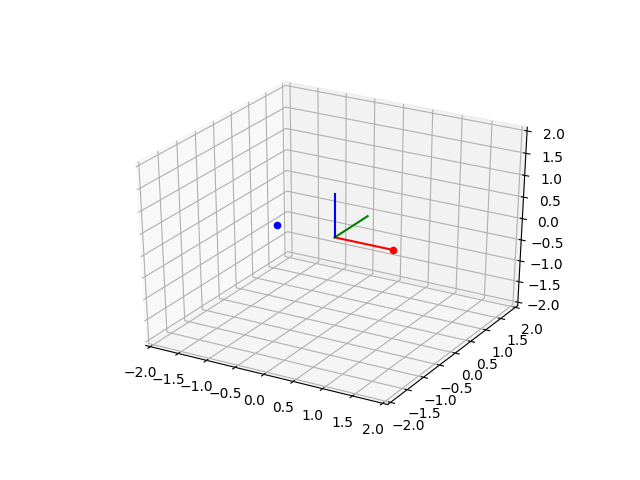

interactive(children=(FloatSlider(value=3.1415927410125732, description='z_val', max=6.2831854820251465), Outp…

In [7]:
# run this command in the shell with the active environment, and then restart notebook
## !jupyter nbextension enable --py --sys-prefix widgetsnbextension
# make it interactive
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.ion()
fig = plt.figure()
ax = fig.add_subplot( 111, projection='3d' )
ax.autoscale( False )
def fcall_rotz( z_val ) :
    global fig, ax, p
    rot = tm.rotationZf( z_val )
    tns = tm.Vector3f( [0., 0., 0.] )
    tf = tm.Matrix4f( rot, tns )
    tp = tf * p
    ax.cla()
    ax.set_xlim( -2.0, 2.0 )
    ax.set_ylim( -2.0, 2.0 )
    ax.set_zlim( -2.0, 2.0 )
    ax.autoscale( False )
    ax.plot( [0.,1.], [0.,0.], [0.,0.], c='r' )
    ax.plot( [0.,0.], [0.,1.], [0.,0.], c='g' )
    ax.plot( [0.,0.], [0.,0.], [0.,1.], c='b' )
    ax.scatter( p.x, p.y, p.z, c='r', marker = 'o' )
    ax.scatter( tp.x, tp.y, tp.z, c='b', marker = 'o' )
    
interactive( fcall_rotz, z_val=( 0., 2. * tm.pi ) )